In [934]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt


In [935]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,2,1,2,2,4,4,7,7,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,117,129,149,149,197,238,428,566,673,790
5,British Columbia,Canada,0,0,0,0,0,0,1,1,...,32,32,39,46,64,64,73,103,103,186
6,New South Wales,Australia,0,0,0,0,3,4,4,4,...,48,55,65,65,92,112,134,171,210,267
7,Victoria,Australia,0,0,0,0,1,1,1,1,...,15,18,21,21,36,49,57,71,94,121
8,Queensland,Australia,0,0,0,0,0,0,0,1,...,15,18,20,20,35,46,61,68,78,94
9,NaN,Cambodia,0,0,0,0,0,1,1,1,...,2,2,3,3,5,7,7,7,33,35


In [936]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>2000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
df

,Canada,China,France,Germany,Iran,Italy,Japan,"Korea, South",Netherlands,Spain,Switzerland,US,United Kingdom
date,,,,,,,,,,,,,
2020-01-22,0,548,0,0,0,0,2,1,0,0,0,1,0
2020-01-23,0,643,0,0,0,0,1,1,0,0,0,1,0
2020-01-24,0,920,2,0,0,0,2,2,0,0,0,2,0
2020-01-25,0,1406,3,0,0,0,2,2,0,0,0,2,0
2020-01-26,1,2075,3,0,0,0,4,3,0,0,0,5,0
2020-01-27,1,2877,3,1,0,0,4,4,0,0,0,5,0
2020-01-28,2,5509,4,4,0,0,7,4,0,0,0,5,0
2020-01-29,2,6087,5,4,0,0,7,4,0,0,0,5,0
2020-01-30,2,8141,5,4,0,0,11,4,0,0,0,5,0


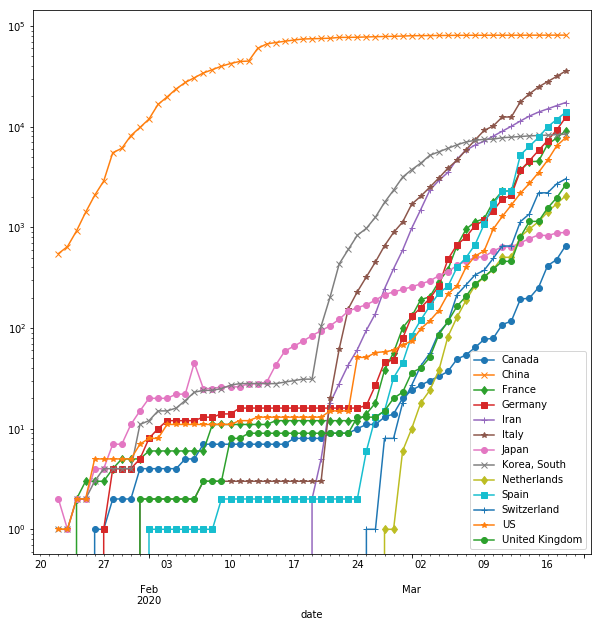

In [937]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
def plotdataframe(df, logy=False, legend=True):
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    for c,m in zip(df,markers):
        df[c].plot(logy=logy, marker=m,  ax=ax)
    
    legend and ax.legend()

    return ax

plotdataframe(df, logy=True)

In [938]:
# Shift all the series

for c in df.columns:
    for i,a in enumerate(df[c]):        
        if i==0 and a>200:
            df[c]=df[c].shift(4) # hack to push out china
            break
        if a>=100:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
del df['China']
df

,Canada,France,Germany,Iran,Italy,Japan,"Korea, South",Netherlands,Spain,Switzerland,US,United Kingdom
0,108.0,100.0,130.0,139.0,155.0,105.0,104.0,128.0,120.0,114.0,118.0,116.0
1,117.0,130.0,159.0,245.0,229.0,122.0,204.0,188.0,165.0,214.0,149.0,164.0
2,193.0,191.0,196.0,388.0,322.0,147.0,433.0,265.0,222.0,268.0,217.0,207.0
3,198.0,204.0,262.0,593.0,453.0,159.0,602.0,321.0,259.0,337.0,262.0,274.0
4,252.0,288.0,482.0,978.0,655.0,170.0,833.0,382.0,400.0,374.0,402.0,322.0
5,415.0,380.0,670.0,1501.0,888.0,189.0,977.0,503.0,500.0,491.0,518.0,384.0
6,478.0,656.0,799.0,2336.0,1128.0,214.0,1261.0,503.0,673.0,652.0,583.0,459.0
7,657.0,957.0,1040.0,2922.0,1694.0,228.0,1766.0,806.0,1073.0,652.0,959.0,459.0
8,NaN,1134.0,1176.0,3513.0,2036.0,241.0,2337.0,962.0,1695.0,1139.0,1281.0,802.0
9,NaN,1217.0,1457.0,4747.0,2502.0,256.0,3150.0,1138.0,2277.0,1359.0,1663.0,1144.0


Text(0,0.5,'Confirmed cases')

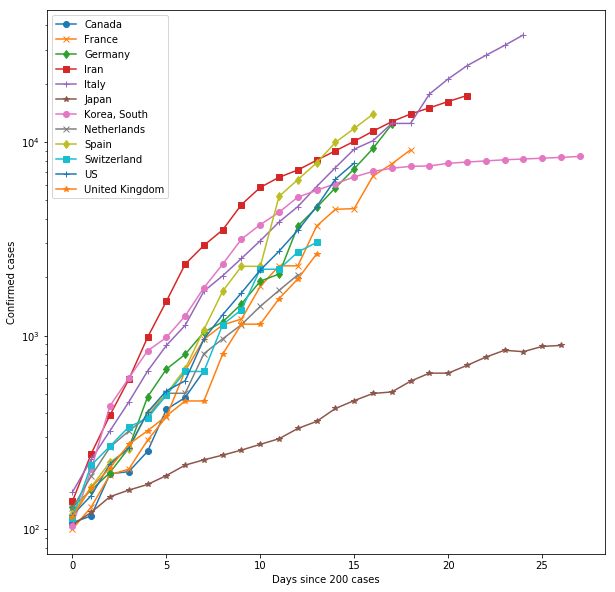

In [939]:
ax=plotdataframe(df, logy=True)
ax.set_xlabel('Days since 200 cases')
ax.set_ylabel('Confirmed cases')

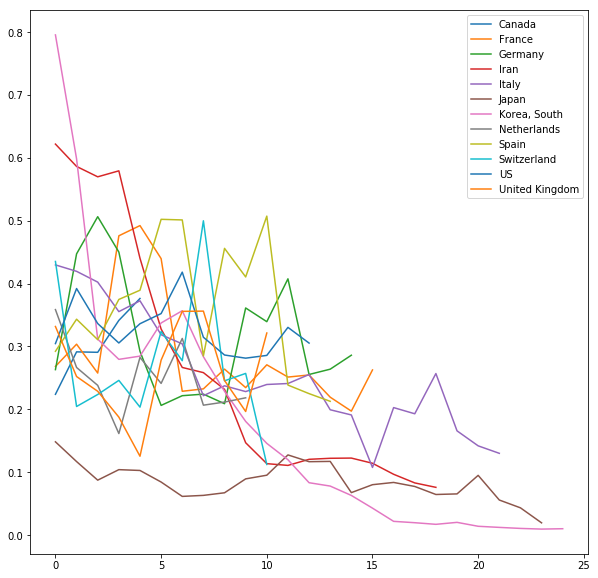

In [915]:
from math import pow
growth = {}
gdf = df
for c in gdf.columns:
    growth[c]=[]
    for i in range(3,len(gdf[c])):        
        if not np.isnan(gdf[c][i] and gdf[c][i]>2000):                          
            growth[c].append(pow(gdf[c][i]/gdf[c][i-3],1.0/3)-1.0)

fig,ax = plt.subplots()
for c in growth:
    ax.plot(growth[c])
ax.legend(growth.keys())

In [916]:
# US and Canada 
df=raw
# temporarily drop 03/14
#del df[df.columns[-1]]
df = df[df['Country/Region'].isin(['Canada','US','Italy'])]

df=df.groupby('Country/Region').sum()


df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)


del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Canada,Italy,US
date,,,
2020-01-22,0,0,1
2020-01-23,0,0,1
2020-01-24,0,0,2
2020-01-25,0,0,2
2020-01-26,1,0,5
2020-01-27,1,0,5
2020-01-28,2,0,5
2020-01-29,2,0,5
2020-01-30,2,0,5


In [917]:
#https://stackoverflow.com/questions/54376900/fit-sigmoid-curve-in-python

from scipy.optimize import curve_fit
import numpy as np
from scipy.optimize import differential_evolution
import warnings

yData = df['US']
xData = range(len(yData))

def sigmoid(x, amplitude, x0, k):
    return amplitude**2/(1.0+np.exp(-(x-k)/x0))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = sigmoid(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minY**2, maxY**2]) # search bounds for amplitude
    parameterBounds.append([1.0/maxX, 1e6]) # search bounds for x0
    parameterBounds.append([minX, maxX]) # search bounds for k

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x, np.array(parameterBounds).T

# by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters, bounds = generate_Initial_Parameters()
print(geneticParameters)
# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
popt, pcov = curve_fit(sigmoid, xData, yData, geneticParameters, bounds=[[0,0,0],[np.inf,np.inf,np.inf]],maxfev=10000)
sigma = np.sqrt(np.diag(pcov)) 
print('Fitted parameters: {} Cov: {} Sigma: {}'.format(popt, pcov,sigma))
print()

modelPredictions = sigmoid(xData, *popt) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

xModel = np.linspace(min(xData), min(xData)+90)



[3.46541699e+01 5.38349790e+05 3.50931711e+01]
Fitted parameters: [227.23646747   3.47274473  61.95298527] Cov: [[1.13283489e+03 2.91752616e+00 4.53873237e+01]
 [2.91752616e+00 8.48662832e-03 1.19001796e-01]
 [4.53873237e+01 1.19001796e-01 1.82332838e+00]] Sigma: [33.65761271  0.0921229   1.35030677]


RMSE: 52.89772968816958
R-squared: 0.9988286877363757


In [918]:
# estimate the uncertainty range of the parameters.
L=np.linalg.cholesky(pcov).T
print(popt)
print(L)
eps = 1
[popt-L.dot([eps,0,0]),
 popt+L.dot([eps,0,0]),
 popt-L.dot([0,eps,0]),
 popt+L.dot([0,eps,0]),
 popt-L.dot([0,0,eps]),
 popt+L.dot([0,0,eps])]

# note we use epsilon = 0.5 instead of 1 stanard deviation. 
# The true distribution is asymmetric and heavy-tailed, so we end up with bad estimates for the amplitude.

[227.23646747   3.47274473  61.95298527]
[[3.36576127e+01 8.66825044e-02 1.34850098e+00]
 [0.00000000e+00 3.11892891e-02 6.76627819e-02]
 [0.00000000e+00 0.00000000e+00 1.71824502e-02]]


[array([193.57885476,   3.47274473,  61.95298527]),
 array([260.89408018,   3.47274473,  61.95298527]),
 array([227.14978497,   3.44155544,  61.95298527]),
 array([227.32314997,   3.50393402,  61.95298527]),
 array([225.88796649,   3.40508195,  61.93580282]),
 array([228.58496845,   3.54040751,  61.97016772])]

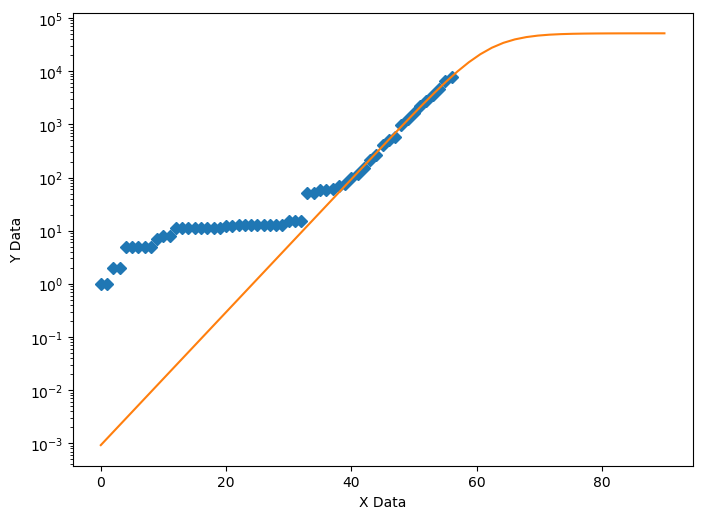

In [919]:
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot    
    yModel = sigmoid(xModel, *popt)

    # now the model as a line plot
    axes.plot(xModel, yModel)
    axes.set_yscale('log')
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

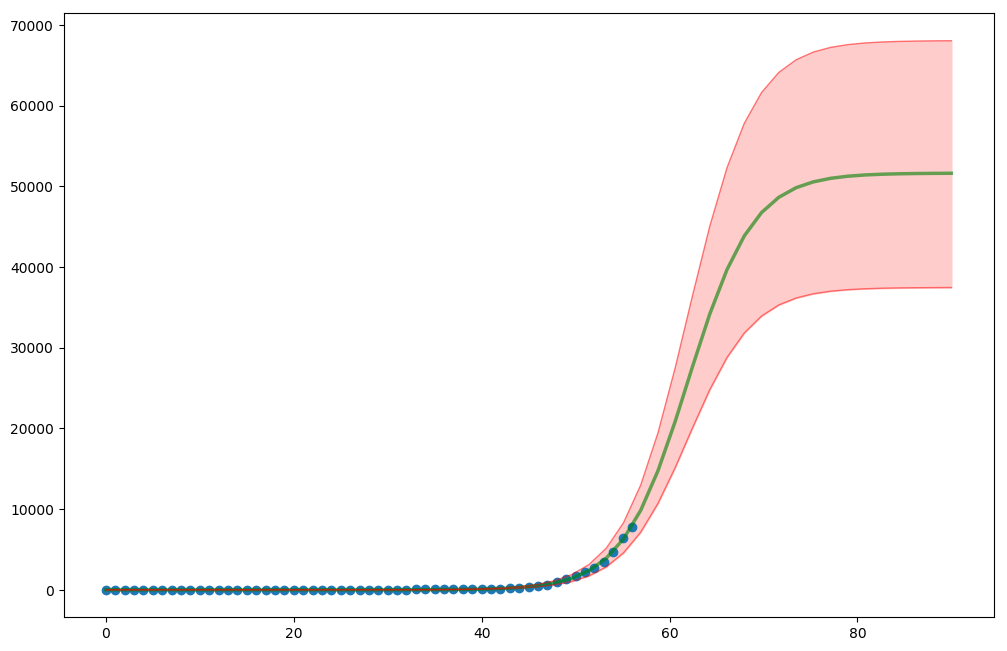

In [920]:
# Plot the best fit sigmoid and uncertainty region.

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
curveFit = sigmoid(xData,*popt)
curveFitModel = sigmoid(xModel,*popt)
plt.plot(xData, yData, 'o')
plt.hold(True)
plt.plot(xModel, curveFitModel, 
    linewidth=2.5, 
    color = 'green',
    alpha = 0.6) #,
    #label = fitEquation)

maxes = None
mins = None

for p in [ [0,eps,0], [eps,0,0], [0,0,eps]]:
    params = popt+L.dot(p)
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    if maxes is None:
        maxes = s
    if mins is None:
        mins =s
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)
    #print(maxes,mins)
    params = popt-L.dot(p)
    #params[0] = max(params[0],max(yData))   # fudge in case the amplitude is negative. 
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)

plt.plot(xModel, maxes, linewidth= 1.0, alpha = 0.5, color='red')
plt.plot(xModel, mins, linewidth= 1.0, alpha = 0.5, color='red')
    
plt.fill_between(xModel, mins, maxes, color='#FFcccc')
#ax.set_yscale('log')
#plt.plot(xModel, sigmoid(xModel,lower[0], lower[1], lower[2] ), #curveFitModel-fitError, 
#    linewidth = 1.0, 
#    alpha = 0.5, 
#    color = 'red')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
#plt.text(3.2, 1.0, 
#    ("$\mathrm{curve fit\;\;values:\;}$\n a = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f \n c = %.3f\t $\pm$ %.3f" 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
#xlabel(r'\textrm{time (s)}', fontsize=24)
#ylabel(r'\textrm{temperature (K)}',fontsize=24)
#plt.title(r"Exponential fit with $\pm 1\sigma$ and $\pm 3\sigma$ fit errors",
#      fontsize=28, color='k')
#ax.legend(fontsize=18)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.savefig('3sigmaPlot.pdf', figsize=(6,4), dpi=600)
#plt.show()

[[19, 20, 20, 20, 20], [11, 11, 11, 11, 12, 11, 11, 12, 11, 11, 11, 11, 11, 10, 10]]


Text(0,0.5,'Country reached X cases Y days after Italy')

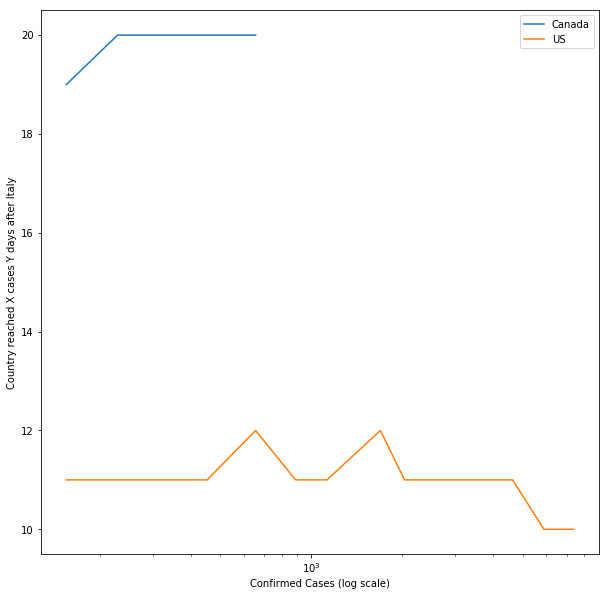

In [921]:
deltas = [[],[]]
vals = []
for i,v in enumerate(df['Italy']):
    if v<100:
        continue
    vals.append(v)
    for j,v2 in enumerate(df['Canada']):            
        if v2>=v:
            deltas[0].append(j-i)
            break
    for j,v2 in enumerate(df['US']):
        if v2>=v:
            deltas[1].append(j-i)
            break
print(deltas)
fig, ax = plt.subplots()
#ax.plot(zip(vals,deltas[0]))

ax.plot(vals[:len(deltas[0])],deltas[0])
ax.plot(vals[:len(deltas[1])],deltas[1])
ax.legend(['Canada','US'])
ax.set_xscale('log')
ax.set_xlabel('Confirmed Cases (log scale)')
ax.set_ylabel('Country reached X cases Y days after Italy')

Text(0,0.5,'Confirmed cases')

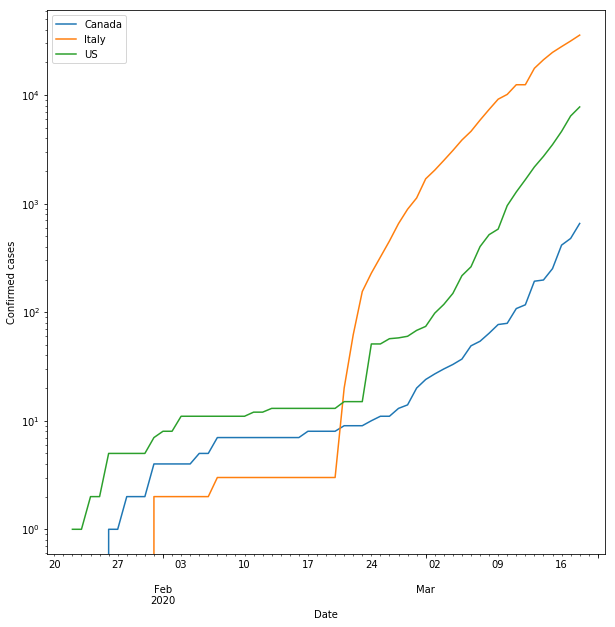

In [922]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(legend=True,logy=True) #list(df.columns))
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed cases')


<ErrorbarContainer object of 3 artists>

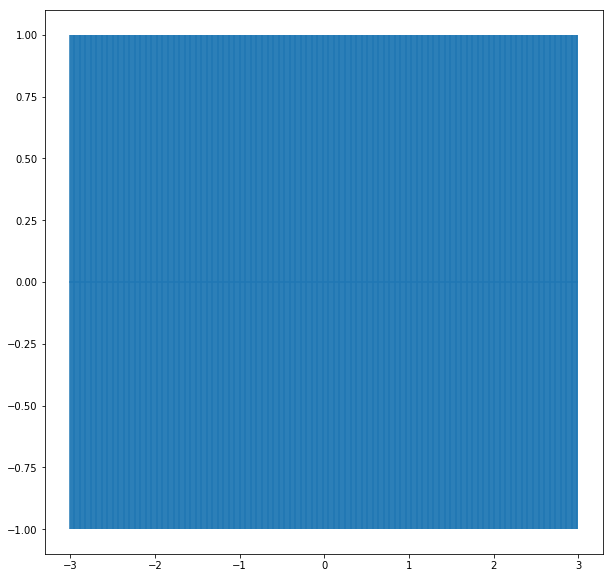

In [923]:
# Try gaussian processes. This is just hacking around. I'm not sure this is the right approach.
us = df['US']
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)

    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))

    return(mu.squeeze(), sigma.squeeze())

import matplotlib.pylab as plt
 
theta = [1, 10]
s0 = exponential_cov(0, 0, theta)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=s0, capsize=0)


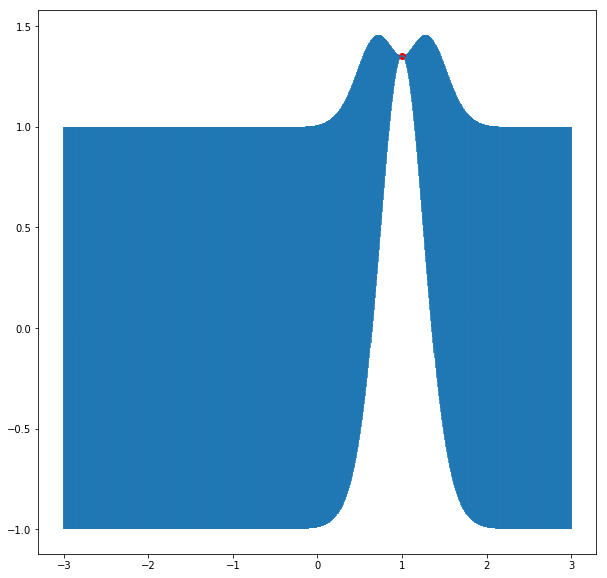

In [924]:
 
x = [1.]
y = [np.random.normal(scale=s0)]

s1 = exponential_cov(x, x, theta)

def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, theta, s1, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")


In [925]:
m, s = conditional([-0.7], x, y, theta)
y2 = np.random.normal(m, s)
y2

-0.05163249655369037

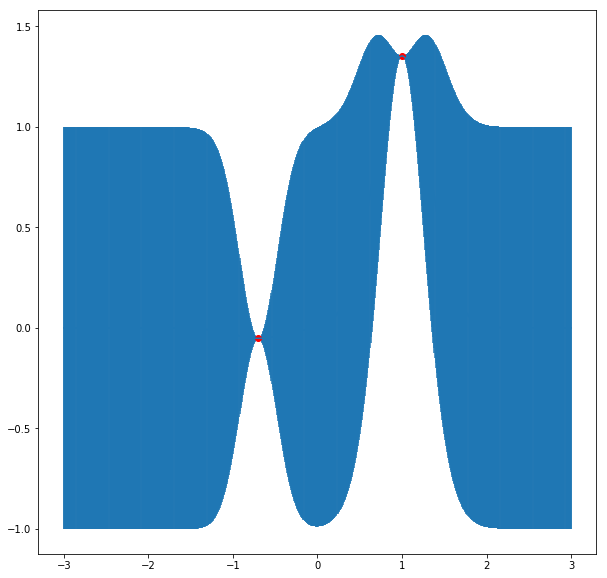

In [926]:
x.append(-0.7)
y.append(y2)
 
σ_2 = exponential_cov(x, x, theta)
predictions = [predict(i, x, exponential_cov, theta, σ_2, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")

In [927]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([ 0.23347075, -1.27899276,  1.93084318,  0.45654108, -0.27099915])

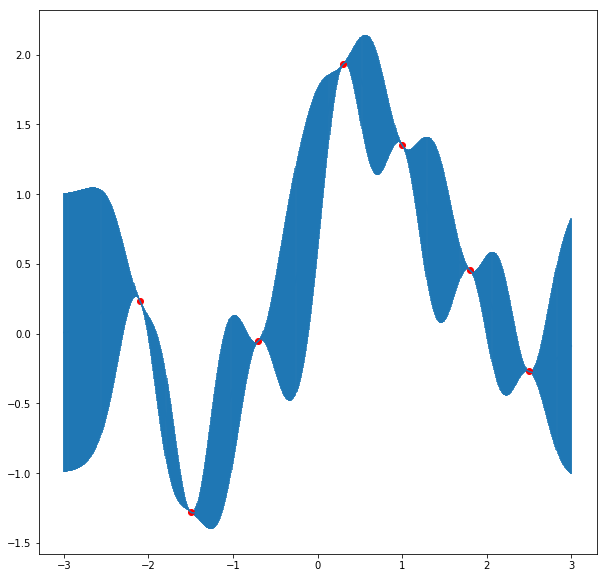

In [928]:
x += x_more
y += y_more.tolist()
 
σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")


In [929]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
X = np.array(range(len(df['US']))).reshape(-1, 1)
X.shape
y = df['US']
X,y

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20],
        [21],
        [22],
        [23],
        [24],
        [25],
        [26],
        [27],
        [28],
        [29],
        [30],
        [31],
        [32],
        [33],
        [34],
        [35],
        [36],
        [37],
        [38],
        [39],
        [40],
        [41],
        [42],
        [43],
        [44],
        [45],
        [46],
        [47],
        [48],
        [49],
        [50],
        [51],
        [52],
        [53],
        [54],
        [55],
        [56]]), date
 2020-01-22       1
 2020-01-23       1
 2020-01-24       2
 2020-01-25       2
 2020-01-26       5
 2020-01-27       5
 2020-01-28       5
 2020-01-29       5
 2020-01-30       5
 2020-01-31    

In [930]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel, normalize_y=True)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [931]:
gp.kernel_

0.00316**2 + Matern(length_scale=11.1, nu=1.5) + WhiteKernel(noise_level=1e+05)

In [932]:


x_pred = xModel.reshape(-1,1) # np.linspace(-6, 6).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)
y_pred


array([600.36081501, 600.35048693, 600.3410395 , 600.33277227,
       600.32580081, 600.32013584, 600.31573412, 600.31253355,
       600.31047673, 600.30952712, 600.30967786, 600.31095727,
       600.31343275, 600.31721436, 600.32245718, 600.32936154,
       600.33817007, 600.34916026, 600.3626309 , 600.3788842 ,
       600.39822114, 600.42090394, 600.44707612, 600.47665315,
       600.50918526, 600.54369455, 600.57851341, 600.61113108,
       600.63821496, 600.65599001, 600.66106001, 600.65241482,
       600.63425054, 600.61179506, 600.58833167, 600.56576962,
       600.54512605, 600.52685289, 600.51105591, 600.49763967,
       600.48640155, 600.47709132, 600.46944766, 600.46321936,
       600.4581766 , 600.45411599, 600.4508617 , 600.44826441,
       600.44619906, 600.44456205])

In [933]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Mexico']))]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Mexico
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
2020-01-29,0
2020-01-30,0
